### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head(10)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
5,Blocos de montar,brinquedos,32.26,0.000000,03/12/2020,Beatriz Moraes,RS,5,cupom,1,-30.17,-53.50
6,Boneca bebê,brinquedos,58.90,0.000000,07/08/2021,João Souza,SP,3,boleto,1,-22.19,-48.79
7,Lava louças,eletrodomesticos,1586.23,84.993080,18/06/2021,Felipe Santos,CE,5,cartao_credito,10,-5.20,-39.53
8,Lavadora de roupas,eletrodomesticos,2024.31,105.372857,08/01/2022,Thiago Silva,SP,1,cartao_credito,5,-22.19,-48.79
9,Carrinho controle remoto,brinquedos,100.26,6.737659,24/02/2020,Beatriz Moraes,SP,5,boleto,1,-22.19,-48.79


#1. Análise do faturamento


In [3]:
#Realização do faturamento de cada loja:
faturamento_loja = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibição do faturamento:
print(f"Faturamento da Loja: R$ {faturamento_loja:,.2f}")
print(f"Faturamento da Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento da Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento da Loja 4: R$ {faturamento_loja4:,.2f}")

Faturamento da Loja: R$ 1,534,509.12
Faturamento da Loja 2: R$ 1,488,459.06
Faturamento da Loja 3: R$ 1,464,025.03
Faturamento da Loja 4: R$ 1,384,497.58


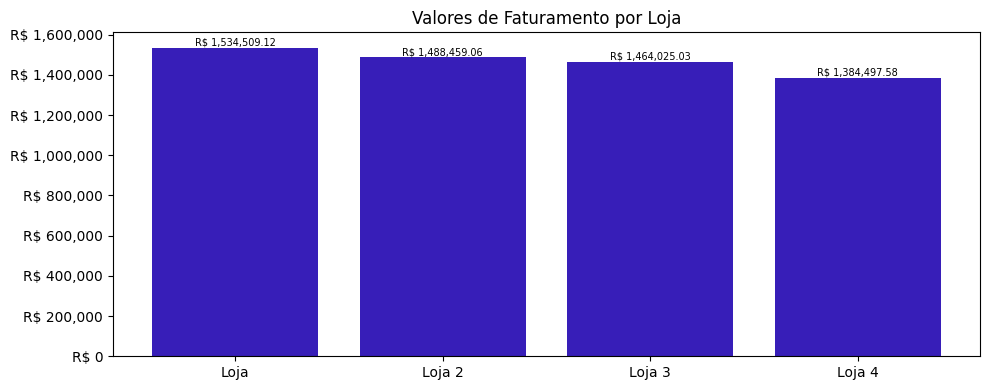

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Dados de faturamento por loja
lojas = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criação do DataFrame do faturamento
df_faturamento = pd.DataFrame({'Loja': lojas, 'Faturamento': faturamento})

# Gráfico de faturamento por loja
plt.figure(figsize=(10, 4))
plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='#371eb8')

# Título
plt.title('Valores de Faturamento por Loja')

# Formata o eixo Y
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('R$ {x:,.0f}'))

# Exibe os valores acima das barras
for i, valor in enumerate(df_faturamento['Faturamento']):
    plt.text(i, valor + 10000, f'R$ {valor:,.2f}', ha='center', fontsize=7)

# Ajuste do layout
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [5]:
#Agrupando e contando as categorias dos produtos das vendas de cada loja
categorias_loja = loja.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja2 = loja2.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja3 = loja3.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja4 = loja4.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")

#Exibição das categorias mais populares para cada loja
print("Categorias populares da Loja 1:")
print(categorias_loja.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias populares da Loja 2:")
print(categorias_loja2.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias populares da Loja 3:")
print(categorias_loja3.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias populares da Loja 4:")
print(categorias_loja4.sort_values(by="Quantidade", ascending=False))

Categorias populares da Loja 1:
    Categoria do Produto  Quantidade
6                 moveis         465
2            eletronicos         448
0             brinquedos         324
1       eletrodomesticos         312
3        esporte e lazer         284
4  instrumentos musicais         182
5                 livros         173
7  utilidades domesticas         171 

Categorias populares da Loja 2:
    Categoria do Produto  Quantidade
6                 moveis         442
2            eletronicos         422
0             brinquedos         313
1       eletrodomesticos         305
3        esporte e lazer         275
4  instrumentos musicais         224
5                 livros         197
7  utilidades domesticas         181 

Categorias populares da Loja 3:
    Categoria do Produto  Quantidade
6                 moveis         499
2            eletronicos         451
0             brinquedos         315
1       eletrodomesticos         278
3        esporte e lazer         277
5           

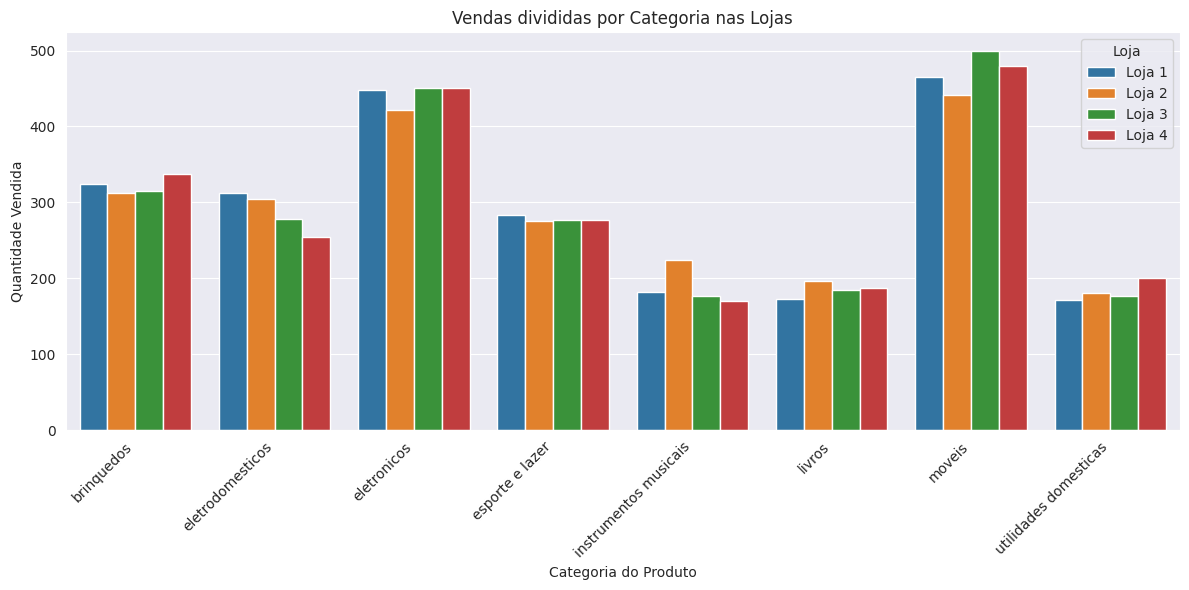

In [6]:
# importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# criando a coluna que identifica cada loja
categorias_loja["Loja"] = "Loja 1"
categorias_loja2["Loja"] = "Loja 2"
categorias_loja3["Loja"] = "Loja 3"
categorias_loja4["Loja"] = "Loja 4"

# concatenando os dataframes
todas_categorias = pd.concat([categorias_loja, categorias_loja2, categorias_loja3, categorias_loja4])

# definindo o estilo e o tamanho do gráfico
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

# gerando o gráfico de barras comparativo
sns.barplot(data=todas_categorias, x="Categoria do Produto", y="Quantidade", hue="Loja")

# ajustando o layout
plt.title("Vendas divididas por Categoria nas Lojas", fontsize=12)
plt.xlabel("Categoria do Produto", fontsize=10)
plt.ylabel("Quantidade Vendida", fontsize=10)
plt.xticks(rotation=45, ha='right')
#plt.legend(title="Loja")
plt.tight_layout()

# exibindo o gráfico
plt.show()

# 3. Média de Avaliação das Lojas

In [7]:
# Criando listas de DataFrames e os nomes das lojas
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Calculo da média das avaliações
medias_avaliacoes = {nome: l['Avaliação da compra'].mean() for l, nome in zip(lojas, nomes)}

# Convertendo o dicionário para DataFrame para visualização
tabela_medias = pd.DataFrame.from_dict(medias_avaliacoes, orient='index', columns=['Média de Avaliações']).round(2)

# Exibindo a tabela final
print(tabela_medias)

        Média de Avaliações
Loja 1                 3.98
Loja 2                 4.04
Loja 3                 4.05
Loja 4                 4.00


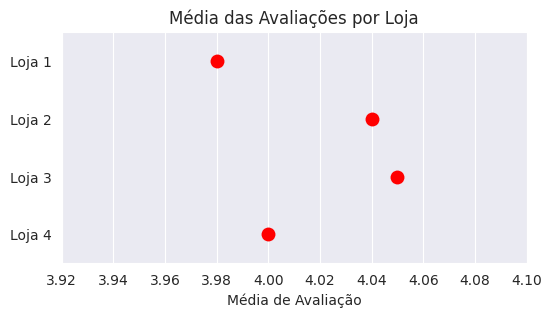

In [8]:
#Importação das bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

#Alterando o nome do DF
df_avaliacoes = tabela_medias.reset_index().rename(columns={'index': 'Loja', 'Média de Avaliações': 'Média de Avaliação'})

# definindo o estilo e tamanho do gráfico
plt.figure(figsize=(6, 3))
sns.set_style("darkgrid")

# gerando o gráfico de pontos e definindo as cores
sns.stripplot(data=df_avaliacoes, x="Média de Avaliação", y="Loja", size=10, color="red")

# Ajuste do rótulo e título
plt.title("Média das Avaliações por Loja", fontsize=12)
plt.ylabel("")

#Ajuste do layout
plt.xlim(3.92, 4.1)
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [16]:
#Identificando os produtos mais e menos vendidos por loja

produtos_loja1 = loja.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja1 = produtos_loja1.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja2 = loja2.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja2 = produtos_loja2.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja3 = loja3.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja3 = produtos_loja3.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja4 = loja4.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja4 = produtos_loja4.sort_values(by="Quantidade Vendida", ascending=False)

#Exibindo os 3 produtos mais vendidos e os tres menos vendidos de cada loja
print("Loja 1:")
print("Mais vendidos:")
print(produtos_loja1.head(3))
print("Menos vendidos:")
print(produtos_loja1.tail(3), "\n")
print("=" * 45)

print("Loja 2:")
print("Mais vendidos:")
print(produtos_loja2.head(3))
print("Menos vendidos:")
print(produtos_loja2.tail(3), "\n")
print("=" * 45)

print("Loja 3:")
print("Mais vendidos:")
print(produtos_loja3.head(3))
print("Menos vendidos:")
print(produtos_loja3.tail(3), "\n")
print("=" * 45)

print("Loja 4:")
print("Mais vendidos:")
print(produtos_loja4.head(3))
print("Menos vendidos:")
print(produtos_loja4.tail(3))
print("=" * 45)

Loja 1:
Mais vendidos:
               Produto  Quantidade Vendida
43  Secadora de roupas                 214
47       TV Led UHD 4K                 196
17              Cômoda                 188
Menos vendidos:
           Produto  Quantidade Vendida
19  Dinossauro Rex                  94
38         Mochila                  90
11    Celular ABXY                  78 

Loja 2:
Mais vendidos:
                     Produto  Quantidade Vendida
28  Iniciando em programação                 223
12          Celular Plus X42                 195
49                    Violão                 183
Menos vendidos:
           Produto  Quantidade Vendida
2        Bicicleta                  98
29   Jogo de copos                  98
36  Mesa de jantar                  89 

Loja 3:
Mais vendidos:
              Produto  Quantidade Vendida
2           Bicicleta                 191
21              Fogão                 182
31  Jogo de tabuleiro                 181
Menos vendidos:
          Produto  Quantidade V

# 5. Frete Médio por Loja


In [20]:
#Calculo da média do valor de frete para cada loja
media_frete = {
    "Loja 1": loja["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}

#Geração do DataFrame para fazer a visualização
df_frete = pd.DataFrame(list(media_frete.items()), columns=["Loja", "Custo Médio de Frete"])
df_frete["Custo Médio de Frete"] = df_frete["Custo Médio de Frete"].round(2)

#Resultado da média
print(df_frete)

     Loja  Custo Médio de Frete
0  Loja 1                 34.69
1  Loja 2                 33.62
2  Loja 3                 33.07
3  Loja 4                 31.28


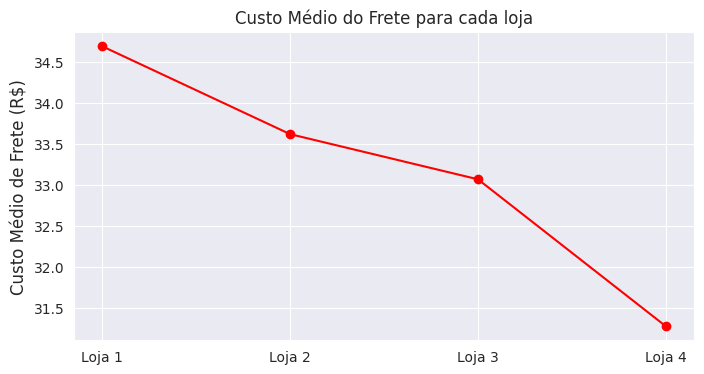

In [30]:
#Import da biblioteca necessária
import matplotlib.pyplot as plt

#Tamanho do gráfico
plt.figure(figsize=(8, 4))

# gerando o gráfico de linhas
plt.plot(df_frete["Loja"], df_frete["Custo Médio de Frete"], marker="o", color="red")

#Ajuste do título e rótulo
plt.title("Custo Médio do Frete para cada loja", fontsize=12)
plt.xlabel("")
plt.ylabel("Custo Médio de Frete (R$)", fontsize=12)

# exibindo o gráfico
plt.show()

Análise Comparativa das Lojas:
A análise dos principais indicadores revela diferentes desafios enfrentados por cada loja, permitindo uma avaliação estratégica sobre seu desempenho e perspectivas de melhoria.
- Menor faturamento total: A Loja 4 apresentou o menor faturamento total, somando R$ 1.384.497,58, o que pode indicar baixa demanda, problemas de precificação ou desafios operacionais.
- Menor média de avaliação de compra: A Loja 1 obteve a menor média de avaliação dos clientes, com 3,98, possivelmente refletindo insatisfação em fatores como atendimento, qualidade do produto ou experiência pós-compra.
- Maior custo médio de frete: A Loja 1 registrou o maior custo médio de frete, atingindo R$ 34,69, o que pode impactar negativamente a conversão de vendas e a fidelização dos clientes.
- Menor consistência nas vendas por categoria: A Loja 4 apresentou pouca uniformidade na distribuição das vendas entre categorias, o que pode indicar falta de equilíbrio na oferta de produtos.
- Menor alcance geográfico: A Loja 4 demonstrou um alcance geográfico pouco significativo, o que pode limitar sua capacidade de expansão e crescimento.


Recomendação Final:
Diante dos resultados, recomenda-se ao Sr. João considerar a venda da Loja 4. Os principais fatores que sustentam essa decisão incluem:
- Baixo faturamento: A loja registra a menor receita total, o que pode comprometer sua sustentabilidade financeira no longo prazo.
- Menor alcance geográfico: A limitação na abrangência de clientes reduz as oportunidades de crescimento e expansão.
- Inconsistência nas vendas: A falta de equilíbrio na distribuição das vendas por categoria pode indicar problemas na curadoria de produtos, impactando negativamente a performance da loja.

Embora o custo médio do frete seja um fator relevante para a Loja 1, os dados mostram que a Loja 4 é a que apresenta os piores desempenhos em múltiplos indicadores chave. Manter a operação pode exigir investimentos substanciais para reverter esse quadro, tornando a venda uma alternativa estratégica mais viável.
